## Introduction
The script below compares GR metrics across the LINCS centres using ANOVA and Tukeys test.<br><br>  The `ANOVA` tests gives an overall measure of whether one or more pairs of centres have statistically significant differences for a given GR metric, but does not tell you where the differences lie.<br><br>  The `Tukeys post hoc test` (or Tukeys Honestly Significant Difference test) tells you which pairs of centres have a significantly different GR metric between them.

## Instructions
To view the data interactively:

1. First, install Jupyter. If you are new to Python, we recommend installing Anaconda Python (which contains Jupyter). You must get the Python 3.6 version of Anaconda, not the 2.7 version!

https://www.anaconda.com/download/

2. Get seaborn version 0.9 by running the command `pip install seaborn==0.9.0` in the terminal.

3. Open Jupyter either by clicking on its icon, or by typing jupyter notebook in a terminal. This will open up Jupyter in your web browser.

4. Navigate to the folder where you downloaded the .ipynb file and the data files.

5. To run the sript, replace `Palbociclib` and `GR50` with the desired drug and metric in the code block below. Then click on `Cell` in the menu bar and `Run all`

In [1]:
drug = 'Palbociclib'
metric = 'GR50'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_dist(df_grmetric, drug, metric):
    dfa = df_grmetric[df_grmetric.agent == drug].copy()
    colors = ['#233CFE', '#A95FC1', '#F93232', '#5F9564',
              '#F8E114ce', '#610051', '#A00000']
    centers = ['Center 2', 'Center 3', 'Center 1A', 'Center 4', 'Center 5',
              'Center 1B', 'Center 1C']
    cdict = {c:col for c, col in zip(centers, colors)}
    fig, ax = plt.subplots()
    sns.catplot(data=dfa, x='agent', hue='center', y=metric, 
                kind='point', join=False, dodge=True, jitter=True, palette=cdict,
               ax=ax)
    plt.close(2)
    ax.set_xlabel('')
    if metric == 'GR50':
        plt.yscale('log')
    

In [3]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def run_anova_test(df_grmetric, drug, metric):
    da = df_grmetric[df_grmetric.agent == drug].copy()
    centers = da.center.unique()
    data = []
    for cl in centers:
        data.append(da[da.center == cl][metric].tolist())
    # Perform ANOVA test and get F-test statistic and p value    
    f_value, p_value = stats.f_oneway(*data)
    dc = da['center'].tolist()
    dt = da[metric].tolist()
    
    print('Anova p-value for %s across all centres is %.3g' % (drug, p_value))
    print('------------------------------------------------')
    # Perform pairwise Tukeys HSD test
    res = pairwise_tukeyhsd(dt, dc)
    print(res)
    dft = pd.DataFrame(res._results_table.data[1:],
                       columns = res._results_table.data[0])
    rt = len(dft[dft.reject == True])
    print('')
    print("There is significant difference in %s for %d out of %d center-pairs based on the Tukey test" % (
    metric, rt, len(dft)))
    print("Refer to the table above for which center-pairs show significant differences (reject = True)")
    plot_dist(df_grmetric, drug, metric)
    return dft

In [4]:
dfg = pd.read_csv('../gr_metric_merged_centres.csv')

## Perform comparision for a given drug and GR metric 

Anova p-value for Palbociclib across all centres is 5.69e-09
------------------------------------------------
  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1    group2  meandiff  lower    upper   reject
-----------------------------------------------------
Center 1A Center 1B -0.6733  -3.4815   2.1349  False 
Center 1A Center 1C -1.1958  -4.3354   1.9438  False 
Center 1A  Center 2  3.3809  -0.5905   7.3522  False 
Center 1A  Center 3  2.1471  -0.9925   5.2867  False 
Center 1A  Center 4 28.8215  25.6819  31.9611   True 
Center 1A  Center 5 -1.2149  -4.3545   1.9247  False 
Center 1B Center 1C -0.5225  -3.6621   2.6171  False 
Center 1B  Center 2  4.0542   0.0828   8.0255   True 
Center 1B  Center 3  2.8204  -0.3192    5.96   False 
Center 1B  Center 4 29.4948  26.3552  32.6344   True 
Center 1B  Center 5 -0.5416  -3.6812   2.598   False 
Center 1C  Center 2  4.5767   0.3644   8.7889   True 
Center 1C  Center 3  3.3429  -0.0964   6.7822  False 
Center 1C  Center 4 30.017

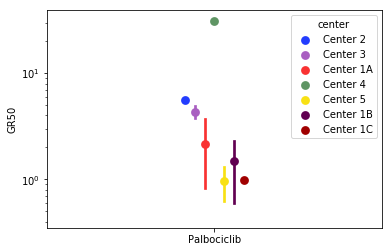

In [5]:
dft = run_anova_test(dfg, drug, metric)